In [1]:
import numpy as np
import os

from skimage import img_as_float
from skimage.io import imread
from skimage.exposure import histogram
from sklearn.metrics import roc_auc_score
from scipy.spatial import distance


from generate_patches import read_labels
from ExposureDescriptor import ExposureDescriptor

In [2]:
labels = read_labels('./patches/viewpoint-1').items()
wrong_labels = read_labels('./patches/viewpoint-2').items()

scores = []
wrong_scores = []
exposure_descriptor = ExposureDescriptor()

for (ref_img_path, original_img_path), (wrong_img_path, _) in zip(labels, wrong_labels):
    ref_img = imread(ref_img_path, as_grey=True)
    original_img = imread(original_img_path, as_grey=True)
    wrong_img = imread(wrong_img_path, as_grey=True)

    ref_desc, _ = histogram(img_as_float(ref_img), nbins=10)
    original_desc, _ = histogram(img_as_float(original_img), nbins=10)
    wrong_desc, _ = histogram(img_as_float(wrong_img), nbins=10)
    
    scores.append(distance.cosine(ref_desc, original_desc))
    wrong_scores.append(distance.cosine(ref_desc, wrong_desc))
    
scores = np.array(scores)
wrong_scores = np.array(wrong_scores)
distances = np.zeros_like(scores)

In [3]:
scores[scores < .2] = 0.0
scores[scores >= .2] = 1.0
scores

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1.

In [4]:
print(len(wrong_scores))
wrong_scores[wrong_scores < .2] = 1.0
wrong_scores[wrong_scores >= .2] = 1.0
wrong_scores.sum()

631


631.0

0.7978306752747754

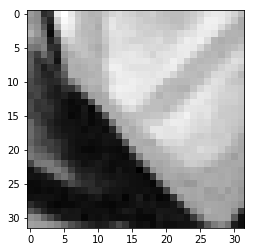

In [5]:
import matplotlib.pyplot as plt
from descriptor import extract_for_patch, distance_weighted

patch1 = imread('./patches/viewpoint-1/img1_patch0.png', as_grey=True)
patch2 = imread('./patches/viewpoint-1/img1_patch1.png', as_grey=True)
descriptor1 = extract_for_patch(patch1)
descriptor2 = extract_for_patch(patch2)

plt.imshow(patch2, cmap='gray')

distance_weighted(descriptor1, descriptor2)